In [2]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Analysis 1:
## Red Sox Team Analysis
How have the Red Sox performed over the years? We will use the team table to explore some interesting features about the Boston Red Sox Performance over the years. 

First we will read in the csv file using Pandas. Then we will remove the columns that we are not interested and take a look at the top of the resulting table.

In [3]:
teams = pd.read_csv('baseballdatabank-2019.2/core/Teams.csv')
teams = teams[['yearID', 'teamID', 'G', 'W', 'L', 'name', 'park', 'attendance']]

Now we only want to look at the team the Red Sox so we will make a new data frame.

In [4]:
redSox = teams[teams.name == 'Boston Red Sox'].copy()

Now that we have the wins and total games played for the red sox each year.
Create a new column that will tell us the win percentage for each year.

In [5]:
redSox['winPct'] = redSox.W / redSox.G

Now we can create a line plot and look at the Red Sox win percent over time 

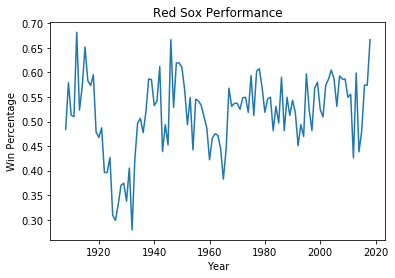

In [6]:
# redSox = redSox[redSox.yearID > 1950]
ax = sns.lineplot('yearID', 'winPct', data=redSox)
ax.set(xlabel='Year', ylabel='Win Percentage', title='Red Sox Performance')
plt.savefig('redSoxPerformance.png')

We can also plot the attendance over the years to see if attendance goes up when they are winning more. This could be good to know so the stadium can makes plans on what attendance to plan for if the team is not doing well. Above we see that the red sox were not doing so well in the early 20's but something happed in the 30's that made them do a lot better really fast. 

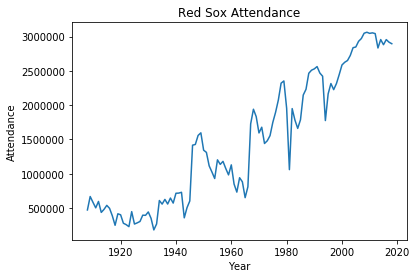

In [7]:
ax = sns.lineplot('yearID', 'attendance', data=redSox)
ax.set(xlabel='Year', ylabel='Attendance', title='Red Sox Attendance')
plt.savefig('redSoxAttendance.png')

We can see that when the Red Sox were not winning as many games their attendance was low. 
Future directions: We could also explore the number of games played each year for them. I want to plot the years they won the world series on here to see how that may have affected attendance. we could take this one step further and figure out the seasons in which the win percentages was above 60% or list the something like that

## Analysis 2:
## Effectivness of Pitcher

In following code we merge People.csv and Pitching.csv. based on playerID

In [8]:
people = pd.read_csv('baseballdatabank-2019.2/core/People.csv',usecols=['playerID','nameFirst','nameLast'])
pitch = pd.read_csv('baseballdatabank-2019.2/core/Pitching.csv',usecols=['playerID','teamID','ERA','yearID'])
mergedData = pd.merge(people,pitch, on='playerID')
mergedData['Player'] = mergedData['nameFirst'] +' ' +  mergedData['nameLast']
mergedData.drop(columns = ['nameFirst','nameLast'],axis=0,inplace=True)
playerUnique = mergedData.Player.unique()[0:10]
# for each in mergedData.Player.unique()[0:10]:
#     display(mergedData[mergedData.Player == each])

Here we do subplots for each player where we compare  
Earned Runs average Vs Year

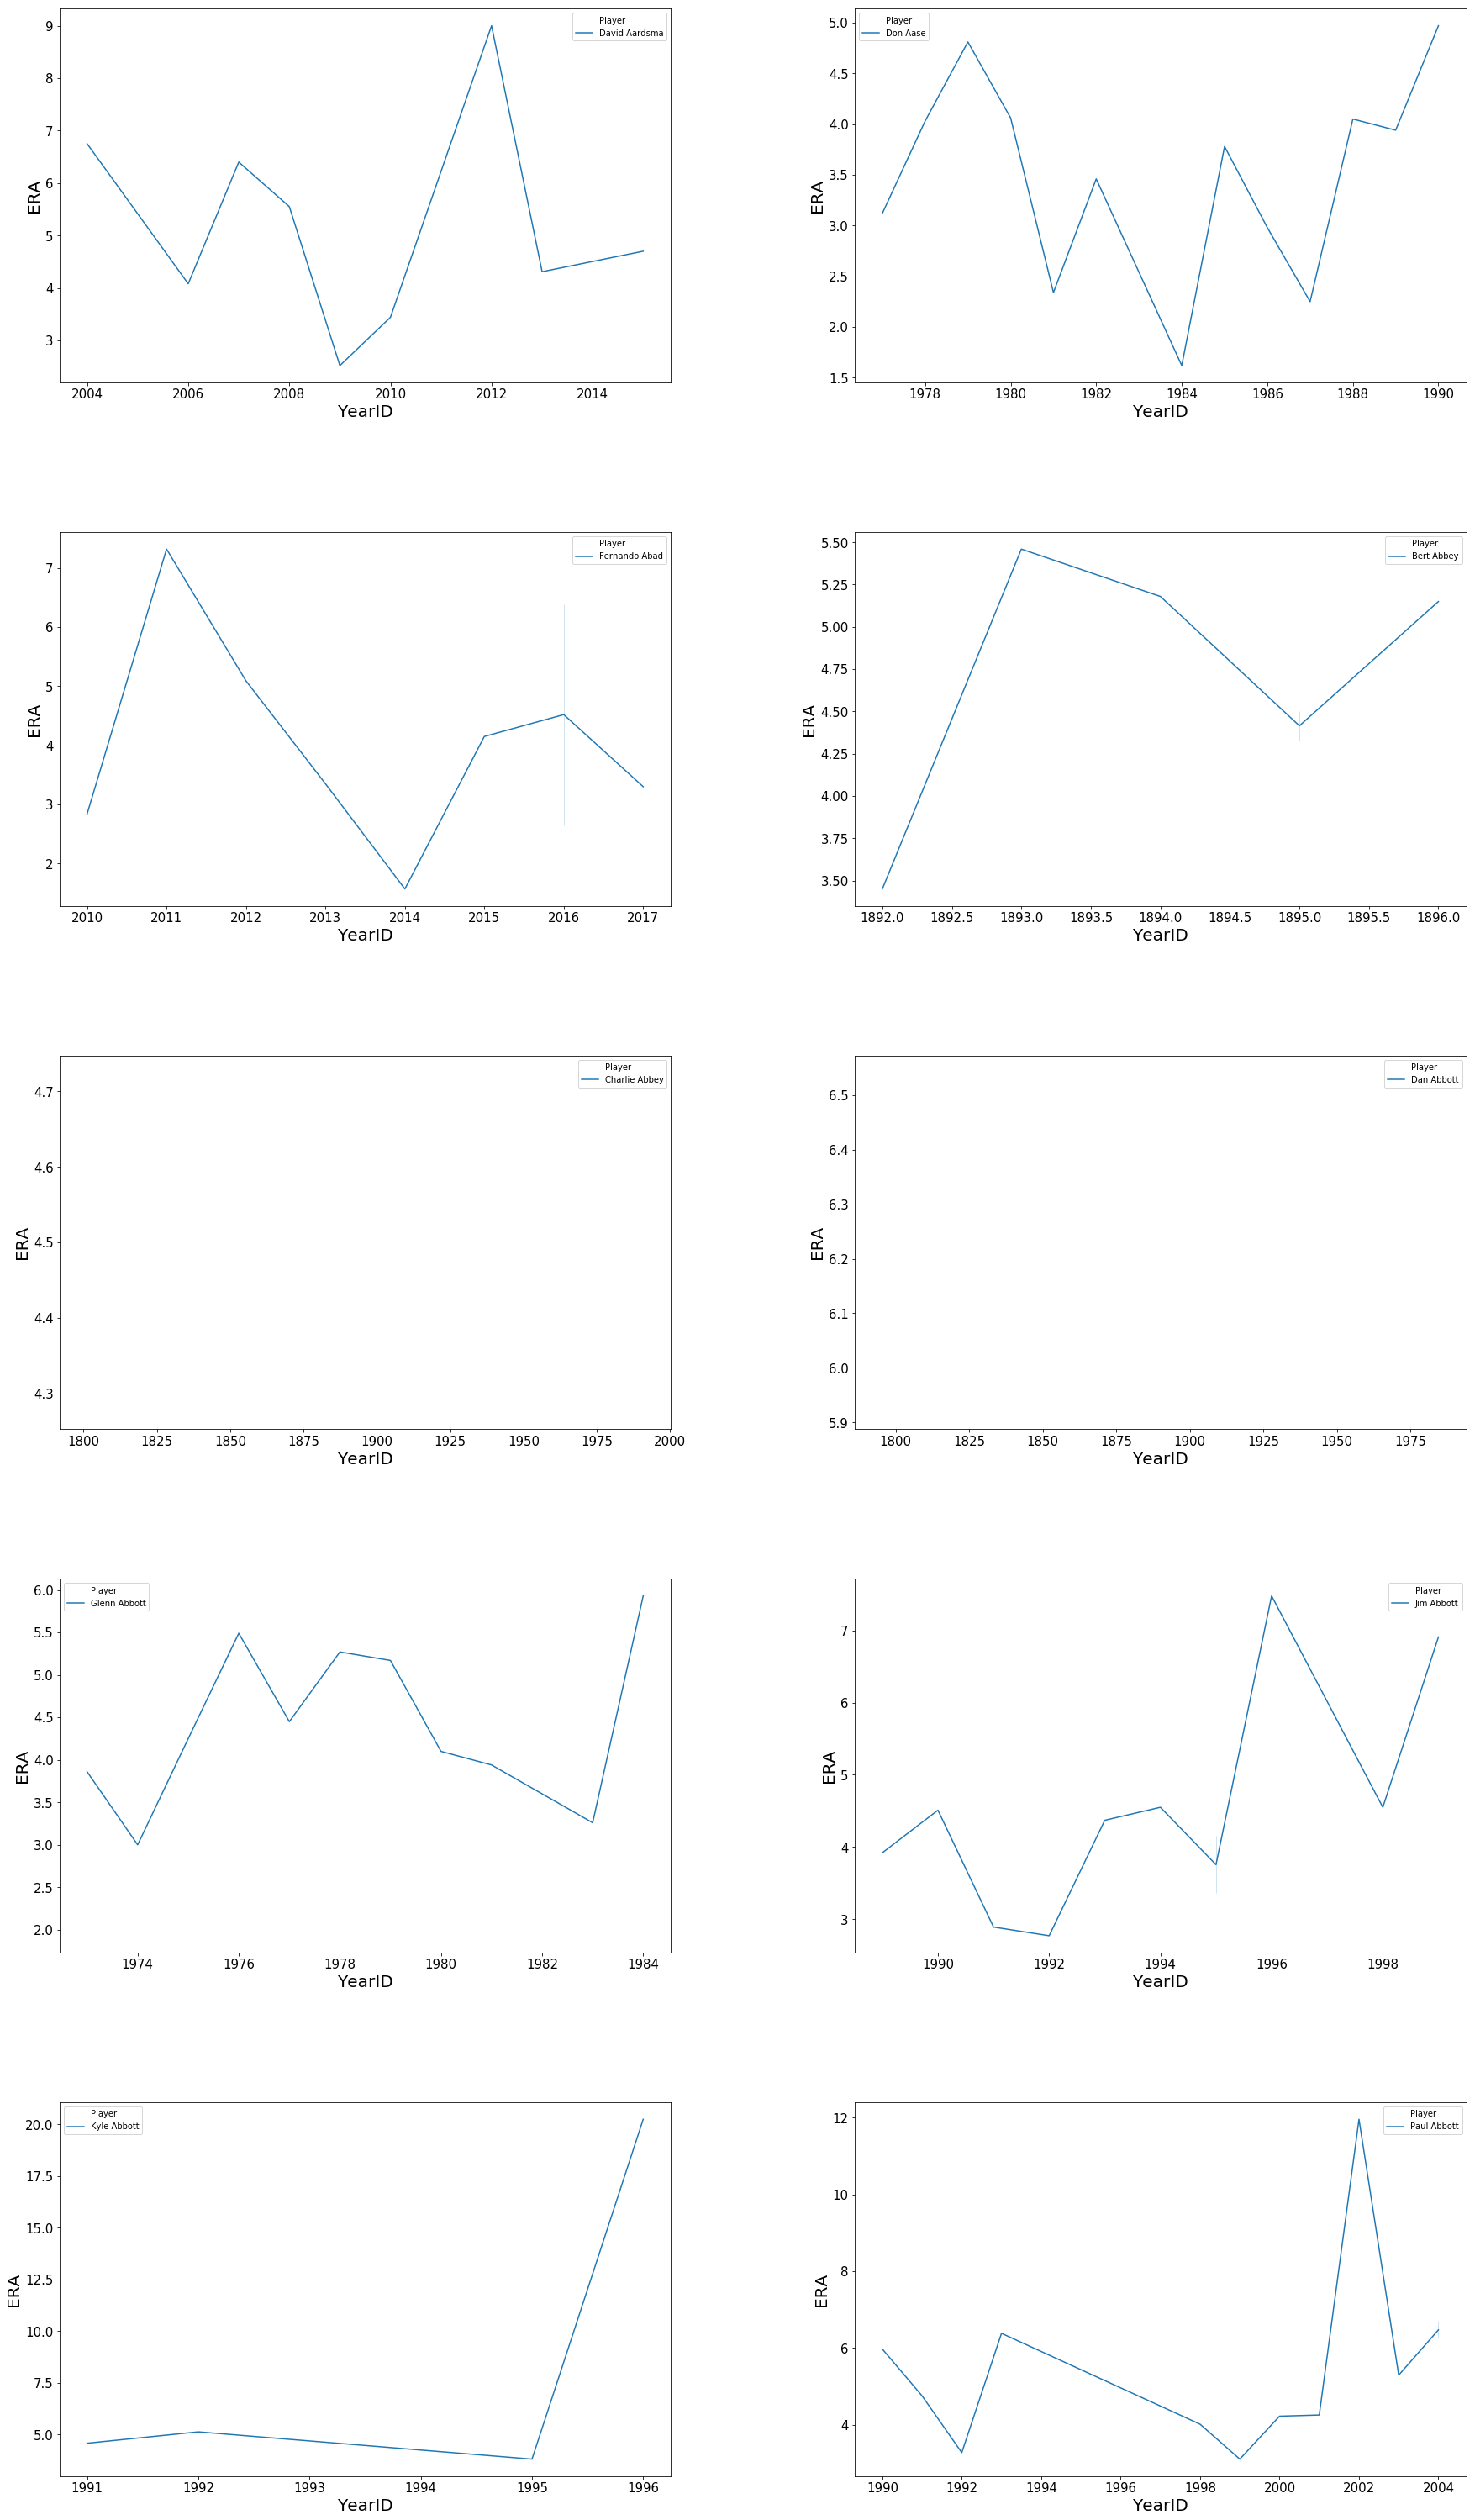

In [9]:
fig= plt.figure(figsize=(30,54))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
for i in range(1,11):
    ax=fig.add_subplot(5,2,i)
    tempDTFrame = mergedData[mergedData.Player == playerUnique[i-1]]
    ax=sns.lineplot(x=tempDTFrame.yearID,y=tempDTFrame.ERA,hue=tempDTFrame.Player)
    ax.set(xlabel='Year', ylabel='Earned Runs Average')
    plt.xticks(rotation=0,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('YearID',fontsize=20)
    plt.ylabel('ERA',fontsize=20)
    plt.savefig('Year VS ERA.png')

## Analysis 3:
## Average Salary
What teams pay the most over the years

In [13]:
salaries = pd.read_csv('baseballdatabank-2019.2\core\Salaries.csv')

FileNotFoundError: [Errno 2] File b'baseballdatabank-2019.2\\core\\Salaries.csv' does not exist: b'baseballdatabank-2019.2\\core\\Salaries.csv'

First we'll group by teams and years

In [12]:
ids = salaries.groupby(['teamID', 'yearID']).mean()
x=[]
for id in salaries.teamID:
    if id not in x:
        x.append(id)

NameError: name 'salaries' is not defined

Then we will assign names to the teams  
Because salary data starts at 1985, start there  
There are duplicate team ID's, but after 1985, we should be good

In [11]:
teams = pd.read_csv('baseballdatabank-2019.2\core\Teams.csv')
names = []
for id in x:
    for tid, tname, year in zip(teams.teamID, teams.name, teams.yearID):
        if year < 1985:
            continue
        if id == tid:
            names.append(tname)
            break

Finally we plot the figure

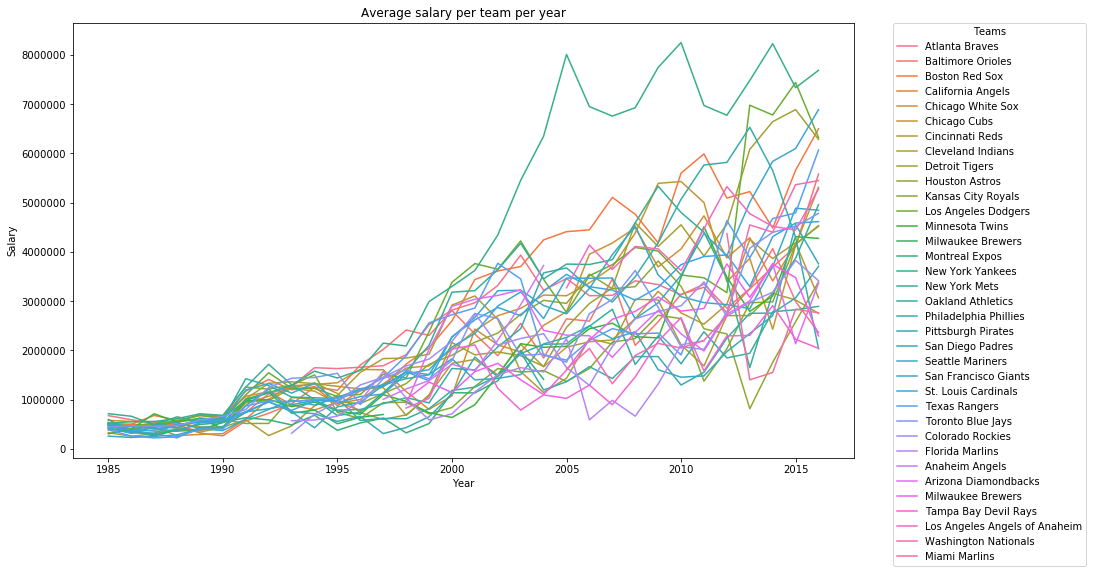

In [12]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(data=salaries, x="yearID", y="salary", hue="teamID", ci=None)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=names)
ax.set(xlabel='Year', ylabel='Salary', title='Average salary per team per year')
plt.show(ax)

## Analysis 4:
## Top Salaries
Adjusted for inflation

Read in CPI data (found on internet)
Hardcode 2019 cpi

In [13]:
cpi = pd.read_csv('baseballdatabank-2019.2\CPI.csv')
curYearCpi = 257.208

In [14]:
salaries2 = pd.read_csv('baseballdatabank-2019.2\core\salaries.csv')

Adjust every players salary for inflation

In [15]:
for i, row in salaries2.iterrows():
    year = salaries2.at[i, 'yearID']
    salary = salaries2.at[i, 'salary']
    newSalary = 0
    newCpi = 0
    for j, jrow in cpi.iterrows():
        cyear = cpi.at[j, 'Year']
        ccpi = cpi.at[j, 'CPI']
        if (year == cyear):
            newCpi = ccpi
            break
    newSalary = salary * (curYearCpi / newCpi)
    salaries2.at[i, 'salary'] = newSalary

In [16]:
players = pd.read_csv('baseballdatabank-2019.2\core\People.csv')

Sort the salaries, and keep top 10

In [17]:
plotSal = salaries2.sort_values(by='salary', ascending=False).head(10)

Replace player id with player name and year, so we don't get the weird error bar

In [18]:
for i, row in plotSal.iterrows():
    iid = plotSal.at[i, 'playerID']
    for j, jrow in players.iterrows():
        jid = players.at[j, 'playerID']
        if iid == jid:
            fullName = players.at[j, 'nameFirst'] + ' ' + players.at[j, 'nameLast'] + ' (' + str(plotSal.at[i, 'yearID']) + ')'
            plotSal.at[i, 'playerID'] = fullName
            break

Plot the top ten players

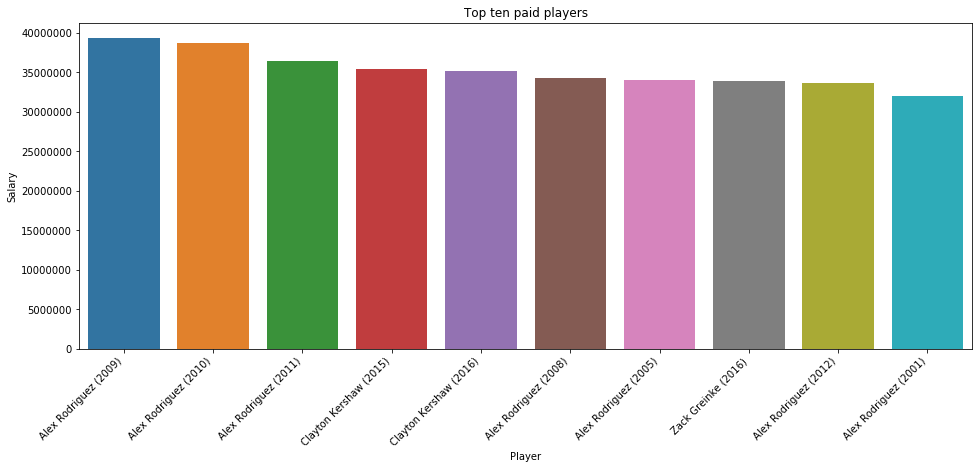

In [19]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=plotSal.playerID, y='salary', data=plotSal, ci=None)
ax.set(xlabel='Player', ylabel='Salary', title='Top ten paid players')
ax.ticklabel_format(style='plain', axis='y')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')